In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


##### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [8]:
list(data.year.unique())

[6, 7]

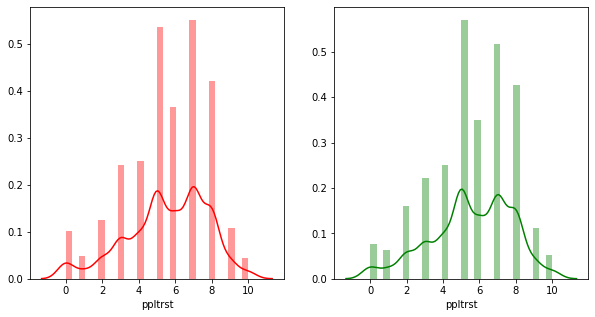

In [32]:
import seaborn as sns

plt.figure(figsize = (10,5))

years = {'y_'+str(i): data[data['year']==i] for i in list(data.year.unique())}
colors = ['red','green']

for i,y in enumerate(years.keys()):
    plt.subplot(1,2,i+1)
    sns.distplot(years[y]['ppltrst'].dropna(), color = colors[i])
    
plt.show()

##### Normality test

In [36]:
def normality_(data, alpha):
    k2,p=stats.normaltest(data)
    print('Reject null, distro is normal: p-value {}'.format(p)) if p < alpha \
            else print('Distro not normal, can\'t reject null: p-value {}'.format(p))

In [43]:
for i,y in zip([2012,2014],years.keys()):
    print(i)
    normality_(years[y]['ppltrst'].dropna(),0.05)

2012
Reject null, distro is normal: p-value 2.604290647718513e-41
2014
Reject null, distro is normal: p-value 1.1470645274812542e-33


##### T-test

In [44]:
import scipy.stats as stats
print(stats.ttest_ind(years['y_6']['ppltrst'].dropna(), years['y_7']['ppltrst'].dropna(), nan_policy='omit'))

Ttest_indResult(statistic=0.13222510058441272, pvalue=0.8948093492496576)


In [66]:
for i,y in zip([2012,2014],years.keys()):
    for c in years[y]['cntry'].unique():
        print(c, i)
        normality_(years[y][years[y]['cntry']==c]['ppltrst'].dropna(),0.05)
        print('='*60)

CH 2012
Reject null, distro is normal: p-value 3.365792056559453e-08
CZ 2012
Reject null, distro is normal: p-value 3.6357853778446555e-06
DE 2012
Distro not normal, can't reject null: p-value 0.7581671476973477
ES 2012
Reject null, distro is normal: p-value 3.7233182008430934e-11
NO 2012
Reject null, distro is normal: p-value 2.734553769183859e-19
SE 2012
Reject null, distro is normal: p-value 1.6891340175735843e-16
CH 2014
Reject null, distro is normal: p-value 1.0859809748932778e-07
CZ 2014
Reject null, distro is normal: p-value 0.0181729632415102
DE 2014
Distro not normal, can't reject null: p-value 0.7242674045554323
ES 2014
Reject null, distro is normal: p-value 3.3865058313911153e-07
NO 2014
Reject null, distro is normal: p-value 3.441457258129768e-16
SE 2014
Reject null, distro is normal: p-value 4.276395667350845e-15


In [67]:
for c in years[y]['cntry'].unique():
    print(c)
    print(stats.ttest_ind(years['y_6'][years['y_6']['cntry']==c]['ppltrst'].dropna(), 
                          years['y_7'][years['y_7']['cntry']==c]['ppltrst'].dropna(), 
                          nan_policy='omit'))
    print('='*60)

CH
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
CZ
Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626856563)
DE
Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
ES
Ttest_indResult(statistic=2.494276516716002, pvalue=0.012687599930326627)
NO
Ttest_indResult(statistic=0.5437669865283744, pvalue=0.5866849635988214)
SE
Ttest_indResult(statistic=-2.089164843127998, pvalue=0.03683208699520371)


##### Happiness

In [70]:
for i,y in zip([2012,2014],years.keys()):
    for c in years[y]['happy'].unique():
        try:
            print(c, i)
            normality_(years[y][years[y]['happy']==c]['ppltrst'].dropna(),0.05)
            print('='*60)
        except:
            pass

8.0 2012
Reject null, distro is normal: p-value 4.819395063113303e-25
9.0 2012
Reject null, distro is normal: p-value 8.3548262206366e-13
7.0 2012
Reject null, distro is normal: p-value 2.3903590018047527e-06
10.0 2012
Reject null, distro is normal: p-value 2.7300485063657455e-06
0.0 2012
Distro not normal, can't reject null: p-value 0.18481346258488981
6.0 2012
Reject null, distro is normal: p-value 0.033570945366609
5.0 2012
Distro not normal, can't reject null: p-value 0.19386860812599804
1.0 2012
Distro not normal, can't reject null: p-value 0.25932655822946377
4.0 2012
Distro not normal, can't reject null: p-value 0.7061072128335459
nan 2012
3.0 2012
Distro not normal, can't reject null: p-value 0.416539105243103
2.0 2012
Distro not normal, can't reject null: p-value 0.5285843820767145
9.0 2014
Reject null, distro is normal: p-value 1.0330270279279708e-12
6.0 2014
Distro not normal, can't reject null: p-value 0.06707459225065154
8.0 2014
Reject null, distro is normal: p-value 2.79

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [68]:
for c in years[y]['happy'].unique():
    print(c)
    print(stats.ttest_ind(years['y_6'][years['y_6']['happy']==c]['ppltrst'].dropna(), 
                          years['y_7'][years['y_7']['happy']==c]['ppltrst'].dropna(), 
                          nan_policy='omit'))
    print('='*60)

9.0
Ttest_indResult(statistic=1.0345844608306516, pvalue=0.3010074429490395)
6.0
Ttest_indResult(statistic=-2.2569661909624177, pvalue=0.024363165229533447)
8.0
Ttest_indResult(statistic=0.28084621395842174, pvalue=0.7788512475664672)
10.0
Ttest_indResult(statistic=-0.6983539964555872, pvalue=0.48509952541876067)
7.0
Ttest_indResult(statistic=0.5075118151227836, pvalue=0.6118694242606888)
5.0
Ttest_indResult(statistic=1.6730877207971044, pvalue=0.09482869048954044)
4.0
Ttest_indResult(statistic=-0.6495636314099265, pvalue=0.5168406453638262)
3.0
Ttest_indResult(statistic=-0.3255115542494122, pvalue=0.745347018857383)
0.0
Ttest_indResult(statistic=-0.8862277486086902, pvalue=0.3836187459846996)
2.0
Ttest_indResult(statistic=-1.3593983483785184, pvalue=0.17956813028981453)
nan
Ttest_indResult(statistic=nan, pvalue=nan)
1.0
Ttest_indResult(statistic=-0.3442651863295487, pvalue=0.7342402663312957)


##### TV - Men or Women?

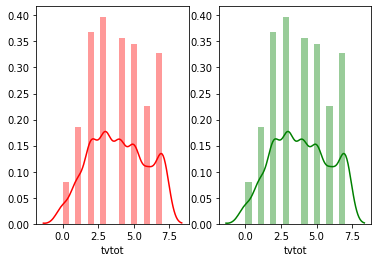

2.0 1
Reject null, distro is normal: p-value 1.2049181771413786e-103
1.0 1
Reject null, distro is normal: p-value 3.0125974743415432e-89

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

t-test
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)


In [86]:
for i,y in enumerate(years['y_6']['gndr'].unique()):
    plt.subplot(1,2,i+1)
    sns.distplot(years['y_6'][years['y_6']['gndr']==c]['tvtot'].dropna(), color = colors[i])
    
plt.show()

for c in years['y_6']['gndr'].unique():
    print(c, i)
    normality_(years['y_6'][years['y_6']['gndr']==c]['tvtot'].dropna(),0.05)
    print('='*60)
    
print('')
print('%'*60)
print('')
print('t-test')
print(stats.ttest_ind(years['y_6'][years['y_6']['gndr']==1]['tvtot'].dropna(), 
                      years['y_6'][years['y_6']['gndr']==2]['tvtot'].dropna(), 
                      nan_policy='omit'))
print('='*60)
